# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  15 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов
* Задача 4 &mdash;  40 баллов





-----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from sklearn.tree import DecisionTreeRegressor

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler

---
## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.


## Задача 2

### 1. Загрузка и предобработка данных.




Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`. С сырыми данными и более подробным описанием задачи можно ознакомиться также [здесь](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification).


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['Crystal_structure.csv']))
data.head()


Saving Crystal_structure.csv to Crystal_structure (1).csv


,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


Сделаем предобработку данных.

In [ ]:
data.head()

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [ ]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature","Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

In [ ]:
data


,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,Lowest distortion
0,0,0,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,0.800000,0
1,0,1,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,0.678571,1
2,0,2,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,0.385714,0
3,0,3,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,0.371429,1
4,0,4,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,0.664286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,72,68,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,0.442857,0
5272,72,69,0,0,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,0.642857,0
5273,72,70,0,0,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,0.678571,1
5274,72,71,0,0,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,0.528571,0


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [ ]:
X = data.loc[:, data.columns != 'Lowest distortion']
y = data['Lowest distortion']
np.unique(y)

array([0, 1, 2, 3])

Обучите модель решающего дерева.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=77
)

Сделайте предсказание для тестовой выборки.

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [ ]:
bernouli = (y_pred == y_test.to_numpy()).astype(np.int16)
bernouli

array([1, 1, 1, ..., 0, 1, 1], dtype=int16)

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [ ]:
z = sps.norm.ppf(1 - 0.95 / 2)
m, n = sum(bernouli), len(bernouli)
left = m/n - z * np.sqrt(m * (n - m) / np.power(n, 2))
right = m/n + z * np.sqrt(m * (n - m) / np.power(n, 2))
print(left, right)

0.6660093641929329 0.7237569023895055


Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [ ]:
n_estimators = 50
model = RandomForestClassifier(n_estimators=n_estimators)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred=model.predict(X_test)
bernouli = (y_pred == y_test.to_numpy()).astype(np.int16)
bernouli

array([1, 1, 1, ..., 0, 1, 1], dtype=int16)

In [ ]:
z = sps.norm.ppf(1 - 0.95 / 2)
m, n = sum(bernouli), len(bernouli)
left = m/n - z * np.sqrt(m * (n - m) / np.power(n, 2))
right = m/n + z * np.sqrt(m * (n - m) / np.power(n, 2))
print(left, right)

0.7621037011186784 0.8133858756343222


**Выводы:**Вероятность предсказание лежит в интервале (0.76,0,81) - вероятность стала лучше


## Задача 3

Рассмотрим данные из <a href='https://miptstats.github.io/courses/ad_mipt/hw8.html' target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики.

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['physics_data.csv']))
data.head()

Saving physics_data.csv to physics_data (2).csv


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140


In [ ]:
data['Eat']
np.unique(data["Eat"])

array([-23.21457916, -21.67299767, -20.9553348 , -20.87466779,
       -20.62965684, -20.54759479, -20.06643729, -19.68378846,
       -19.66293225, -19.47191476, -19.39587986, -19.08907365,
       -19.01376253, -18.97708754, -18.95791957, -18.94194041,
       -18.5153506 , -18.29701428, -18.26700281, -18.12957342,
       -18.1250959 , -17.74820386, -17.68119389, -17.59487501,
       -17.58204834, -17.51524495, -17.42771873, -17.38992872,
       -17.37847681, -17.29075399, -17.28081858, -17.13411764,
       -17.10930221, -17.07090243, -16.9715966 , -16.95703309,
       -16.92692578, -16.87890679, -16.83724437, -16.82147764,
       -16.70152039, -16.60914184, -16.49543173, -16.36732036,
       -16.24501649, -16.2098749 , -16.16960404, -16.11250667,
       -16.10268605, -16.09131795, -16.04543438, -15.95245724,
       -15.91056175, -15.67373738, -15.64474077, -15.63233447,
       -15.61388098, -15.55451087, -15.5218703 , -15.48048483,
       -15.43088982, -15.32858632, -15.31722657, -15.20

In [ ]:
X , y = data.iloc[:, :-2].to_numpy(), data['Eat'].to_numpy()
y_new = y.astype('int64')
y_new

array([-19, -10,  -9, -13,  -8, -16, -17, -15, -10,  -8, -12, -14,  -8,
       -13,  -8, -11, -10, -11, -11,  -8,  -8, -12, -10, -11, -11, -13,
       -14, -11,  -9,  -9,  -9,  -9, -12, -11,  -5, -13, -12, -17,  -9,
       -11, -16, -15, -12, -14, -11, -11, -12, -12, -15, -11,  -7, -11,
       -16,  -9,  -9,  -7, -10,  -9, -12, -13,  -9, -14, -13, -11, -12,
        -9,  -7, -14,  -2, -11, -14,  -5, -16,  -7, -12, -10, -21,  -6,
        -8,  -8, -10,  -8,  -5, -17,  -7,  -9, -11, -11, -15, -15,  -9,
        -8, -11, -10, -10, -10,  -6, -12,  -9, -10, -16,  -9,  -6, -11,
        -8, -10, -11, -10,  -7, -10,  -9, -14, -10, -10, -10, -10, -13,
       -13,  -5, -15, -12, -13, -12, -13,  -9, -10, -11, -14,  -5,  -6,
       -16, -18, -14,  -5, -10, -13, -11,  -7, -12,  -4, -12, -14, -14,
       -14, -14, -14, -14, -14, -12, -11,  -9, -13,  -8, -13, -13,  -7,
        -9,  -7,  -8,  -9,  -6, -11,  -9,  -8,  -6, -11,  -8,  -5, -11,
       -14,  -6, -10,  -6,  -9,  -5,  -8, -11, -20,  -8, -13, -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.2, train_size=0.8 ,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

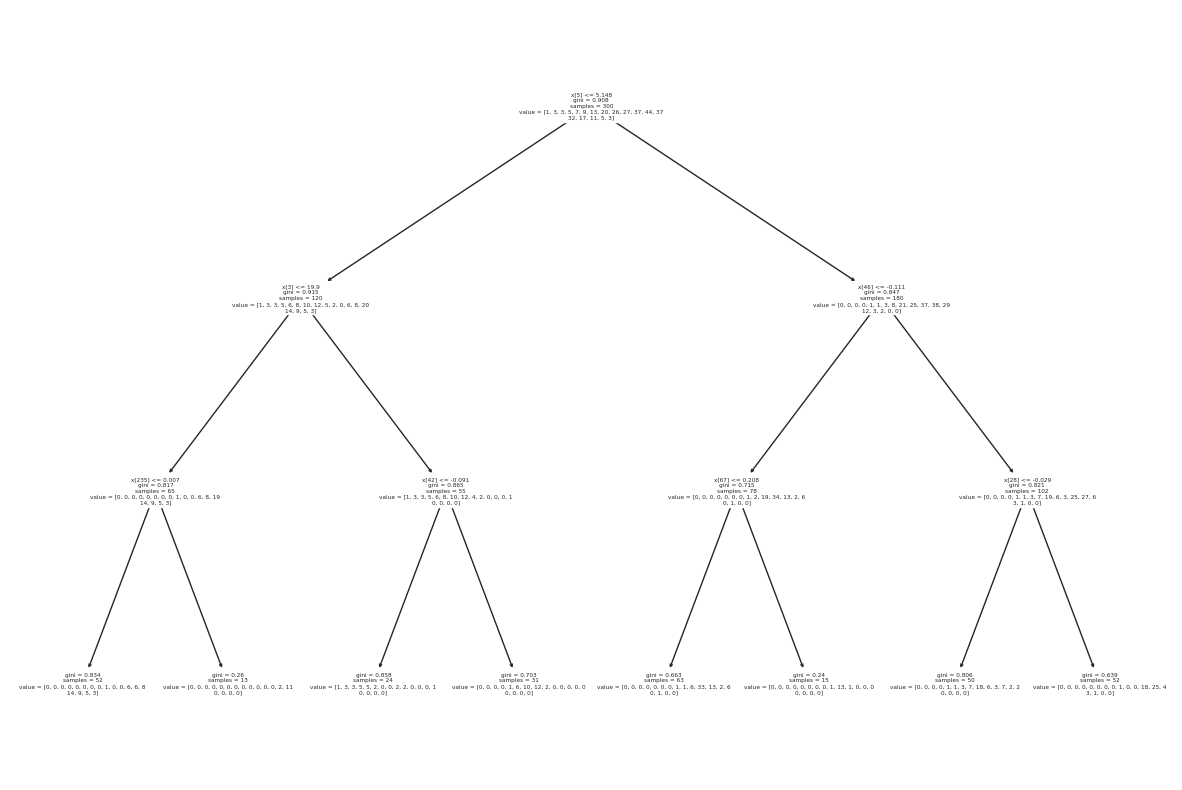

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
tree.plot_tree(model)
plt.show()

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [ ]:
max_depth_values = np.arange(20) + 1
real_depth = []
error = []
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42).fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    real_depth.append(model.get_depth())
    error.append(mean_squared_error(y_valid, y_pred))

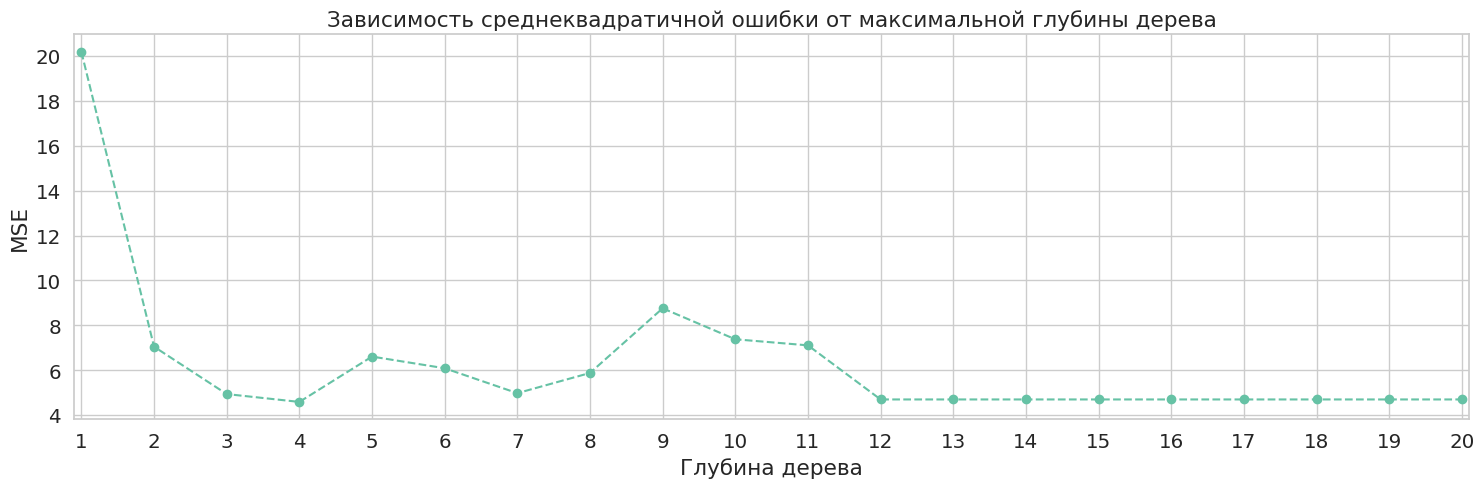

In [ ]:
plt.figure(figsize = (18, 5))

plt.plot(max_depth_values, error, 'o--')
plt.xlim(1 - 0.1 , max(max_depth_values) + 0.1)

plt.title("Зависимость среднеквадратичной ошибки от максимальной глубины дерева")
plt.xlabel("Глубина дерева")
plt.xticks(max_depth_values)
plt.ylabel("MSE");

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [ ]:
min_leaves_values = np.arange(100) + 1
num_leaves = []
error = []
for leaves in min_leaves_values:
      model = DecisionTreeClassifier(min_samples_leaf = leaves ,random_state = 42).fit(X_train, y_train)
      y_pred = model.predict(X_valid)
      num_leaves.append(model.get_depth())
      error.append(mean_squared_error(y_pred, y_valid))

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

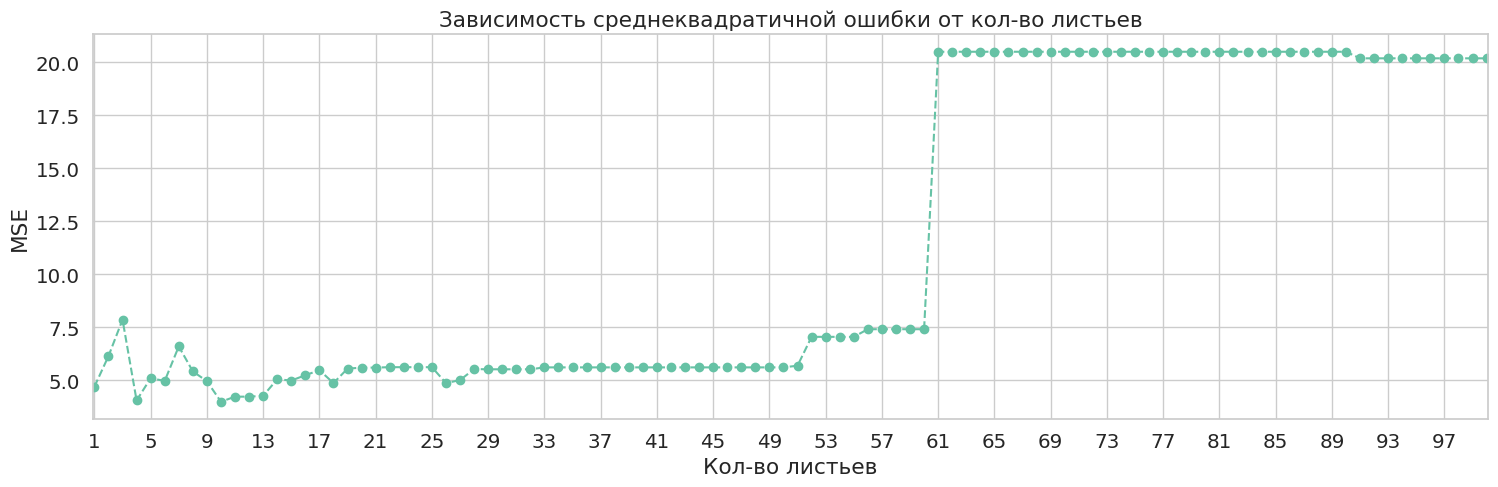

In [ ]:
plt.figure(figsize = (18, 5))

plt.plot(min_leaves_values, error, 'o--')
plt.xlim(1 - 0.1 , max(min_leaves_values) + 0.1)

plt.title("Зависимость среднеквадратичной ошибки от кол-во листьев")
plt.xlabel("Кол-во листьев")
plt.xticks(min_leaves_values[::4])
plt.ylabel("MSE");

Возьмем минимальное кол-во листьев 4 и глубину 7


In [ ]:
model = DecisionTreeClassifier(min_samples_leaf = 4, max_depth = 7 ,random_state = 42).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.31

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

<Axes: >

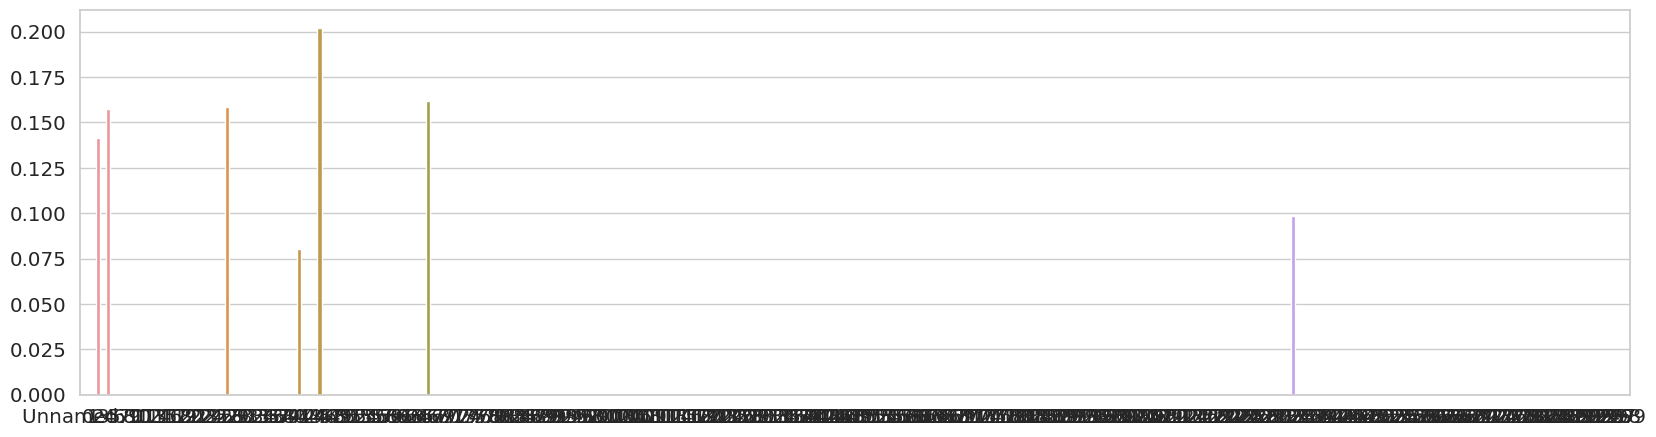

In [ ]:
features = model.feature_importances_
features[features != 0]
X = data.iloc[1:, :-2].columns
plt.figure(figsize = (20, 5))
sns.barplot(y = features, x = X)


Сделайте выводы.

**Вывод:** Знаю, что по оси x ничего не видно, ноу меня  не осталось времени, поэтому по индексу в массиве в features можно найти признаки, которые больше всего повлияли


## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

Сделайте выводы.

**Вывод:** <...>